In [1]:
import numpy as np
from scipy import stats
import matplotlib
import matplotlib.pyplot as plt

# A. Visualization of How  the Kalman Filter works?   

## Example: "Where the heck is my buddy?" 

A variation of https://python.quantecon.org/kalman.html

**Storyline begins ('Expert Knowledge'):** Mike wants to meet Michelle. Looking at a normed campus map, Mike is about to decide where to try first. 

Mike knows Michelle well, so his $\underline{expert judgement}$ is that at this precise time of the day, Michelle likes to hang out in the Oxford cafe. Mike has a geeky normed campus map that has the Oxford's counter right in the middle of the map and that university and sport facilities within the normed interval of $\pm 1$. Not surprisingly, the respective map coordinates are 

$$
\hat{x} = [0.0, 0.0]'.
$$

The Oxford got a sizeable 'Biergarten'. In addition, its two weeks prior to exam time. Mike got some doubts whether Michelle will be sitting right in front of the counter. Nevertheless, Mike is sure she will be in the Oxford or its neighboring 'Biergarten'. As Mike is a genious, he $\underline{guesses}$ Michelle's location $x$ at

$$
x :\sim N(\hat{x}, \Sigma), \quad \text{with} \quad \Sigma := \begin{pmatrix} 0.005 & 0 \\ 0 & 0.005 \end{pmatrix}
 \quad \text{and} \quad \hat{x} = [0.0, 0.0]'.
$$


In [2]:
# Mike's best guess of Michelle's location
xhat  = np.array([0, 0])
Sigma = np.matrix( [[0.005, 0.0],
                    [0.0, 0.005]]) 

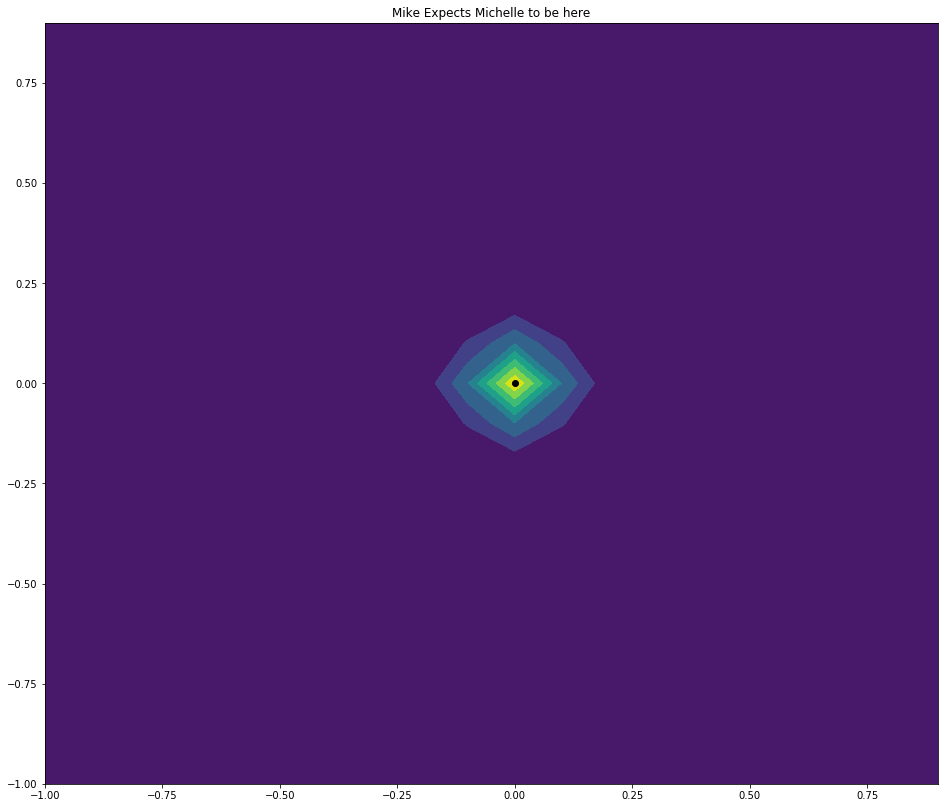

In [3]:
# Visualize the area of the Oxford cafe
x1, x2 = np.mgrid[-1:1:0.1, -1:1:0.1]
pos = np.dstack((x1, x2))
fig1 = plt.figure(figsize=(16,14))

rv1 = stats.multivariate_normal( xhat, Sigma )
ax1 = fig1.add_subplot(111, title = 'Mike Expects Michelle to be here')
ax1.plot(0, 0, 'o', color = 'black')
ax1.contourf(x1, x2, rv1.pdf(pos))
plt.show()

**Storyline continunes ('Noisy Observation'):** Before Mike heads-off to his most probable guess $\hat{x} = [0,0]'$, he calls his buddy Jeff to ask him to join. Jeff is on his way to the library which is another 300 meter head of him. He reveals that he believes to see Michelle right at the entrance of the library. He is pretty sure, yet, given the 300 meter distance, he got also some slight doubts. The entrance of the library has on Mike's map the coordinates

$$
y = [0.5, 0.25]'.
$$

"That seems odd, its Oxford time, don't you think", says Mike. Genious Mike continues: "Jeff, how certain are you that it is indeed Michelle that you see 300 meter in front of you". Jeff says, "I am pretty positive" and hungs up as he has to give way to a fast approaching car.  

Mike wonders how to translate Jeff's "I am pretty positive". Clearly, Jeff stated he has just $\underline{observed}$ Michelle at $y = [0.5, 0.25]'$. Yet, Jeff was not sure. His observation is affected by noise. The 300 meter distance, the bussy road on which he was walking and the rush are plausible reasons for why Jeff might have been wrong. 

Genious Mike quantifies the $\underline{measurement error}$ as

$$
N(0, R), \quad \text{with} \quad R:= 4 \times Sigma,
$$
which means he is pretty positive on Jeff's perception. 

**Feel free to check how things change if you use 0.4 or 1.0 instead of 4 in the expression for R**

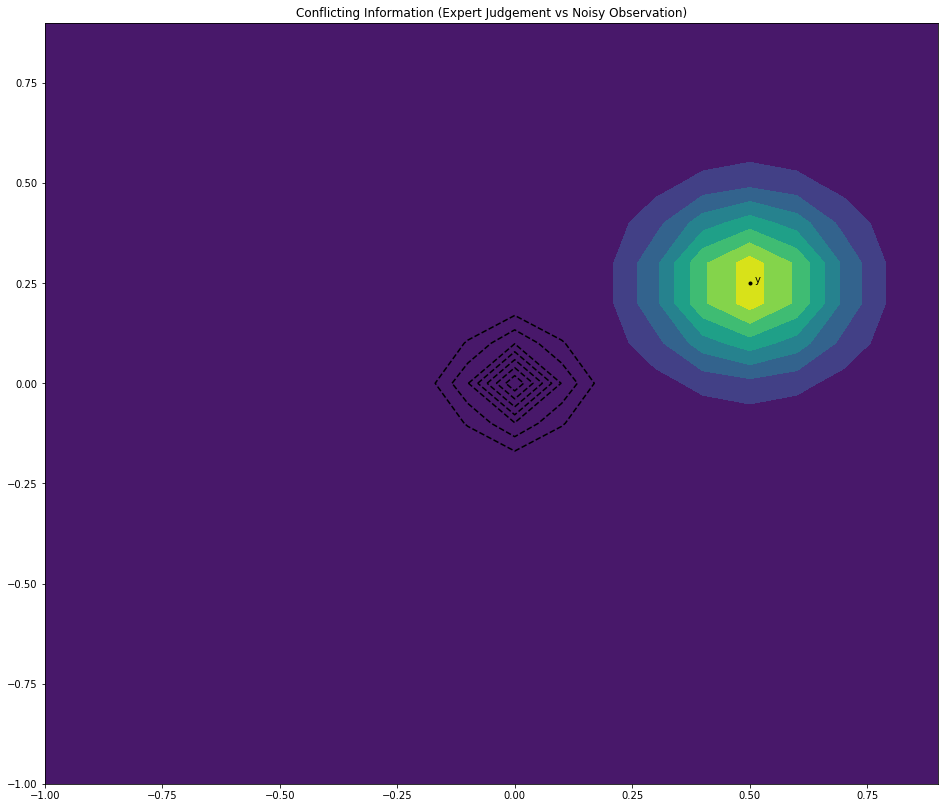

In [4]:
#Mike adds Jeff's Observation into his campus map

#Jeff's observation of Michelle
y = np.array( [0.5, 0.25] )

#Jeff's 'I am pretty positive'
R = 4 * Sigma

#Mike's map
x1, x2 = np.mgrid[-1:1:0.1, -1:1:0.1]
pos = np.dstack((x1, x2))
rv2 = stats.multivariate_normal( y, R )

fig2 = plt.figure(figsize=(16,14))
ax2 = fig2.add_subplot(111, title = 'Conflicting Information (Expert Judgement vs Noisy Observation)')
ax2.plot(y[0], y[1], '.', color = 'black')
ax2.annotate('y', xy=(y[0], y[1]), xytext=(0.51, 0.251))
ax2.contourf(x1, x2, rv2.pdf(pos))
ax2.contour(x1, x2, rv1.pdf(pos), colors = 'black', linestyles = 'dashed')
plt.show()

**Storyline continues ('Information Fusion')** 

Genius Mike reasons: If Jeff's observation was accurate, Mike's guess of Michelle's positon would be off by a prediction error $\nu_t$

$$
\nu_t := y - \hat{x} = [0.5, 0.25]' - [0, 0]' = [0.5, 0.25]'.
$$

By how much shall Mike update is prior judgement? Clearly, by less than $\nu_t = [0.5, 0.25]'$, as Jeff was not 100\% certain. In fact, Genious Mike placed Jeff's trustworthiness at a fourth of his own certainty, i.e. $R = 4 \times Sigma$. Genious Mike concludes that the $\underline{optimal}$ rate of $\underline{updating}$ is initial guess is

$$
K_t = \frac{\Sigma}{\Sigma + R} = \frac{\Sigma}{\Sigma + 4 \Sigma} = \frac{1}{5} << 1.
$$

Intuitively, Mike updates his prior belief about Michelle's location in direction of Jeff's (semi)-trust worthy observation. The update coincides with $\frac{1}{5}$-th of the prediction error $\nu_t$. 

Mike's $\underline{updated}$ best guess (i.e. posterior estimate) is 

$$
\hat{x}_p = \hat{x} + K_t *  \nu_t = [0,0]' + 0.20 * [0.5, 0.25]' = [0.1, 0.05]'.
$$

and 

$$
\Sigma_p = \Sigma - K_t * \Sigma = \frac{4}{5} \Sigma = \frac{4}{5} \times \begin{pmatrix} 0.005 & 0 \\ 0 & 0.005 \end{pmatrix} = \begin{pmatrix} 0.004 & 0 \\ 0 & 0.004 \end{pmatrix}.
$$

In [5]:
# Mike will hence head to $xhat_p$ as his first stop
xhat_p  = np.array([0.1, 0.05])
Sigma_p = np.matrix( [[0.004, 0.0],
                    [0.0, 0.004]]) 


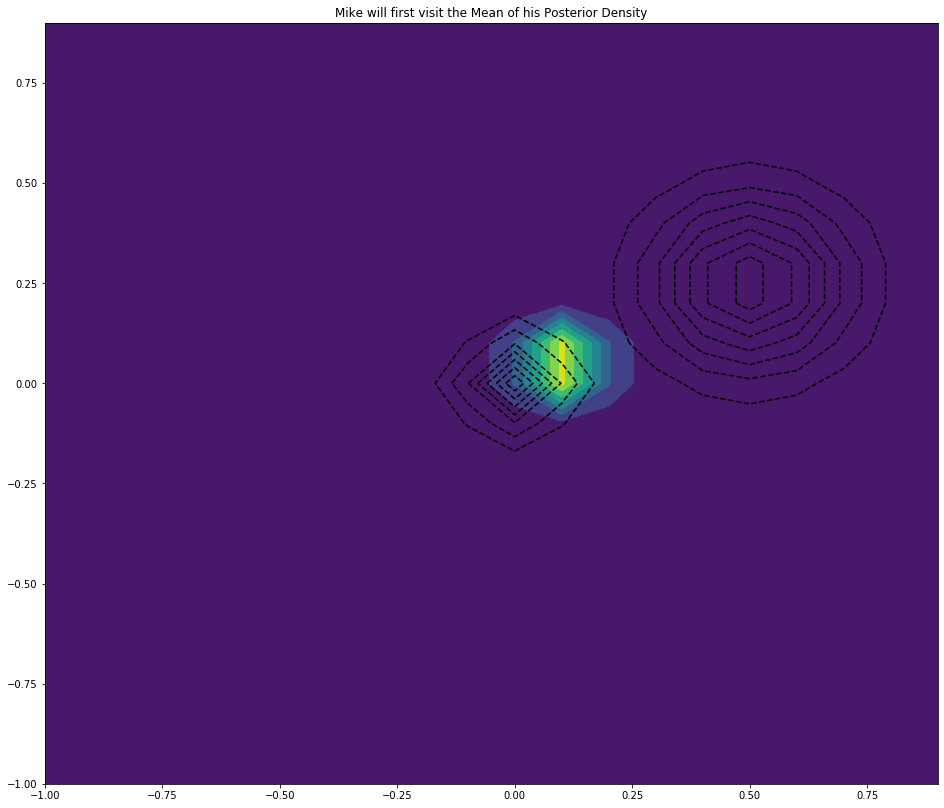

In [6]:
x1, x2 = np.mgrid[-1:1:0.1, -1:1:0.1]
pos = np.dstack((x1, x2))
rv3 = stats.multivariate_normal( xhat_p, Sigma_p )

fig3 = plt.figure(figsize=(16,14))
ax3 = fig3.add_subplot(111, title = 'Mike will first visit the Mean of his Posterior Density')
ax3.contourf(x1, x2, rv3.pdf(pos))
ax3.contour(x1, x2, rv1.pdf(pos), colors = 'black', linestyles = 'dashed')
ax3.contour(x1, x2, rv2.pdf(pos), colors = 'black', linestyles = 'dashed')
plt.show()

**Genious Mike fells comfortable to try first to meet Michelle at the Biergarten to the north east of the Oxford.**